In [3]:
import numpy as np
import matplotlib.pyplot as plt
import src.math_tool as mt
import src.img_tool as it
import src.apertures as apertures

%load_ext autoreload
%autoreload 2
%matplotlib ipympl

π, λ = np.pi, 0.532
k = 2*π/λ
D = 30e3
x, y = np.linspace(-512, 512, 512, endpoint=False), np.linspace(-512, 512, 512, endpoint=False)
Δx, Δy = x[1] - x[0], y[1] - y[0]
# rigous angular division
# define center of array as (0, 0) # (x, y)[Nx/2-0.5, Ny/2-0.5] = (0, 0) | (x, y)[511, 511] = (-0.5, -0.5) | (x, y)[512, 512] = (0.5, 0.5)
x += Δx/2
y += Δy/2
x, y = np.meshgrid(x, y, indexing='ij')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
A1_path = './aperture/f32.npy'
A2_path = './aperture/f45.npy'
save_path = './aperture/tmp'
A1 = np.load(A1_path)
A2 = np.load(A2_path)

In [5]:
A12 = A1.copy() # A12 is mix of A1 and A2
phasor = x + 1j*y
angle = np.mod(np.angle(phasor), 2*π)
# aperture[0:512, 0:512] = aperture_50[0:512, 0:512]
# aperture[512:1024, 512:1024] = aperture_50[512:1024, 512:1024]

# plt.imshow(aperture.T, aspect='auto', cmap='plasma')
# plt.savefig(f'{path}/A.png', dpi=300, bbox_inches='tight')
# plt.show()

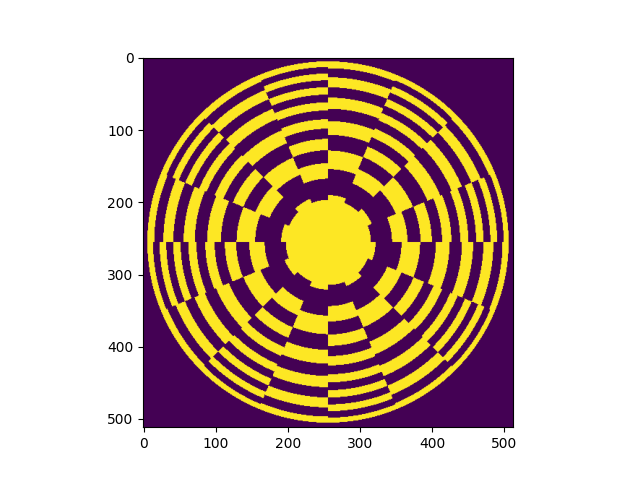

In [7]:
# angular mix of aperture
N_divide = 8
tmp = np.mod(angle, 2*π/N_divide) < 2*π/N_divide/2
A12_angular = A1*tmp + A2*(1-tmp)
plt.cla()
plt.imshow(A12_angular)
plt.show()
name = 'f32f45_angular8'
plt.savefig(f'{save_path}/{name}.png')
np.save(f'{save_path}/{name}.npy', A12_angular)

0.5


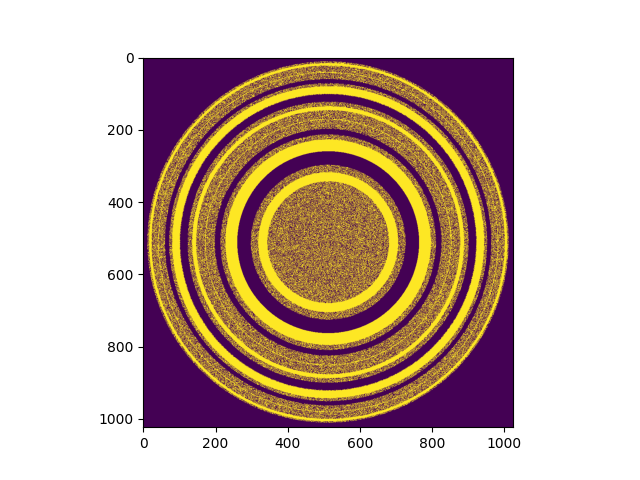

In [38]:
# random shuffle of aperture pixels
tmp = np.zeros((1024*1024), dtype=bool)
tmp[:512*1024] = True
print(tmp.mean())
np.random.shuffle(tmp)
tmp = tmp.reshape(1024, 1024)
A12_shuffle = tmp * A1 + (1-tmp) * A2
plt.cla()
plt.imshow(A12_shuffle)
plt.show()
name = 'f49f33_shuffle'
plt.savefig(f'{save_path}/{name}.png')
np.save(f'{save_path}/{name}.npy', A12_shuffle)

0.5000038146972656


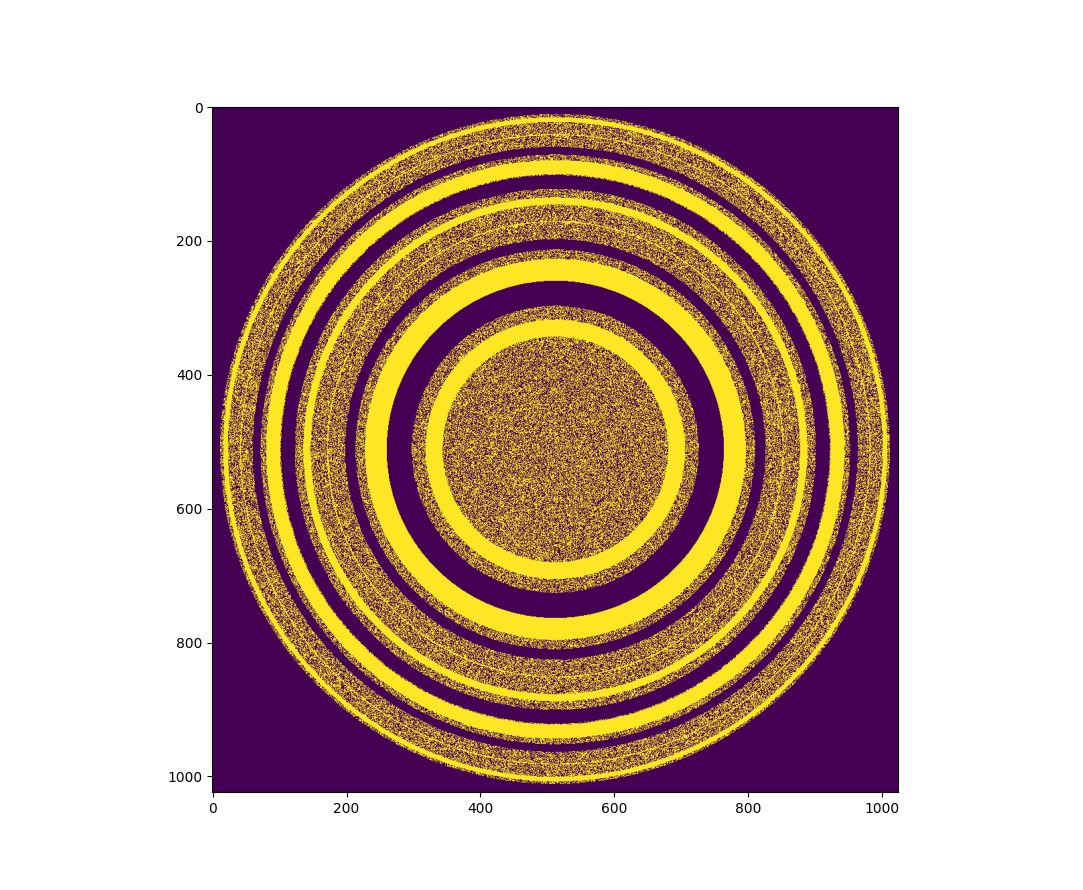

In [39]:
# random prob mixture of aperture pixels
tmp = np.random.choice([True, False], (1024, 1024))
print(tmp.mean())
A12_prob = tmp * A1 + (1-tmp) * A2
plt.cla()
plt.imshow(A12_prob)
plt.show()
name = 'f49f33_prob'
plt.savefig(f'{save_path}/{name}.png')
np.save(f'{save_path}/{name}.npy', A12_prob)